In [1]:
import pandas as pd
import numpy as np

names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header=None, names=names , delim_whitespace = True, na_values='?')

df.head(5)

"""
Attribute Information:
    1.  CRIM      per capita crime rate by town
    2.  ZN        proportion of residential land zoned for lots over 
                  25,000 sq.ft.
    3.  INDUS     proportion of non-retail business acres per town
    4.  CHAS      Charles River dummy variable (= 1 if tract bounds 
                  river; 0 otherwise)
    5.  NOX       nitric oxides concentration (parts per 10 million)
    6.  RM        average number of rooms per dwelling
    7.  AGE       proportion of owner-occupied units built prior to 1940
    8.  DIS       weighted distances to five Boston employment centres
    9.  RAD       index of accessibility to radial highways
    10. TAX       full-value property-tax rate per $10,000
    11. PTRATIO   pupil-teacher ratio by town
    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town
    13. LSTAT     % lower status of the population
    14. MEDV      Median value of owner-occupied homes in $1000's
"""



"\nAttribute Information:\n    1.  CRIM      per capita crime rate by town\n    2.  ZN        proportion of residential land zoned for lots over \n                  25,000 sq.ft.\n    3.  INDUS     proportion of non-retail business acres per town\n    4.  CHAS      Charles River dummy variable (= 1 if tract bounds \n                  river; 0 otherwise)\n    5.  NOX       nitric oxides concentration (parts per 10 million)\n    6.  RM        average number of rooms per dwelling\n    7.  AGE       proportion of owner-occupied units built prior to 1940\n    8.  DIS       weighted distances to five Boston employment centres\n    9.  RAD       index of accessibility to radial highways\n    10. TAX       full-value property-tax rate per $10,000\n    11. PTRATIO   pupil-teacher ratio by town\n    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town\n    13. LSTAT     % lower status of the population\n    14. MEDV      Median value of owner-occupied homes in $1000's\n"

In [2]:
print(df.shape)

(506, 14)


In [3]:
y = df['PRICE'].values
x = df['RM'].values

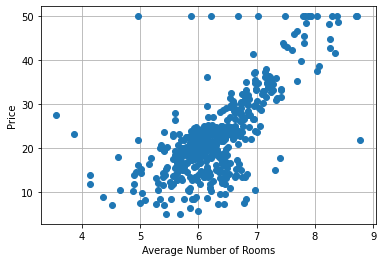

In [4]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')
plt.grid()

## Calculate the Least Square Solution

In [5]:
## Use np.mean to compute mean, np.var to compute the variance

## Use np.mean to compute mean, np.var to compute the variance
mean_x = np.mean(x)
mean_y = np.mean(y)

print(mean_x)
print(mean_y)

6.284634387351779
22.532806324110677


In [6]:
var_x = np.var(x)
print(var_x)

covxy = np.mean((x-mean_x)*(y-mean_y))

0.49269521612976297


In [7]:
w1 = covxy/var_x
w0 = mean_y - w1*mean_x
print('w1= ',w1,'w0= ',w0)

w1=  9.10210898118031 w0=  -34.67062077643857


Text(0.5, 1.0, 'Line of the best fit')

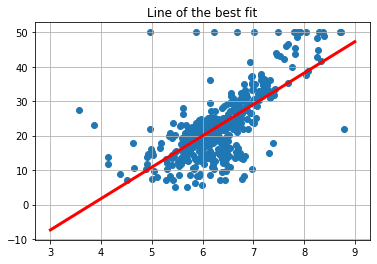

In [8]:
xplt = np.linspace(3,9,100)
yplt = w0 + w1*xplt

plt.plot(xplt, yplt, c='red', linewidth = 3)
plt.scatter(x, y)
plt.grid()
plt.title('Line of the best fit')

In [9]:
yhat = w0 + w1*x
MSE = np.mean((y - yhat)**2)
print('MSE: ', MSE)

MSE:  43.60055177116956


### Use sklearn to perform the linear regression

w1 =  [[9.10210898]]
w0 =  [-34.67062078]


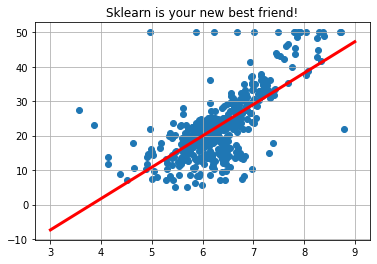

In [14]:
## Results in the same line as the previous section
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y.reshape(-1,1))

print ('w1 = ', regr.coef_)
print ('w0 = ', regr.intercept_)

yplt = regr.predict(xplt.reshape(-1,1))
plt.figure()
plt.plot(xplt,yplt, c='red', linewidth = 3)
plt.scatter(x,y)
plt.grid()
plt.title('Sklearn is your new best friend!');